Author: **Oguz Alp Eren**

Instructor: **Michael D. Parrott**

**Projects in Advanced Machine Learning** 2023, Columbia University

You can find this report at this GitHub repository https://github.com/OguzAlpEren/Oguz-Alp-Eren-Advanced-ML-Projects

# Write up a report on U.N. World Happiness Data

## Part 1: Loading the Data and Preprocessing

### Loading the Data

In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade

In [2]:
# Here are several classic ML architectures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation


In [3]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [4]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [5]:
y_train.head()

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [6]:
import numpy as np
np.random.seed(42)

### Prepocessing

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [8]:
numeric_features

['GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Terrorist_attacks']

In [9]:
categorical_features

['region', 'sub-region']

In [10]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [11]:
# Check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

## Part 2: Explore Bivariate Results and Examine the Important Features

### Explore Bivariate Results

In [13]:
from matplotlib import pyplot as plt

Looking at the relationships between the predictor variables and the target variable, according to the graphs below, we can see that:

- Happiness and GDP per capita are positively correlated. The majority of happy people have a GDP per capita greater than 1 point and almost all of them are above 0.75.
- Happiness and Healthy life expectancy are positively correlated. The majority of happy people have a Healthy life expectancy greater than 0.8 points and almost all of them are above 0.7.
- Happiness and Social support are positively correlated. The majority of happy people have a Social support greater than 1.3 points and almost all of them are above 1.2.
- Happiness and Freedom to make life choices are positively correlated. The majority of happy people have a score greater than 0.4 for Freedom to make life choices.

The scores for unhappy people (and people who think that they are average on the happiness scale) do vary a lot for all of the above. However, we see that most happy people have score above average on GDP per capita, Healthy life expectancy, Social support, and Freedom to make life choices.



Text(0, 0.5, 'Happiness')

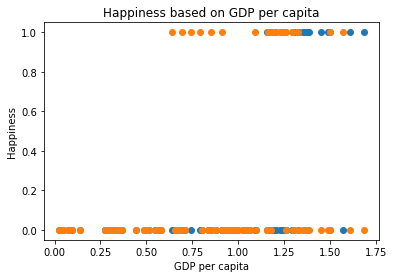

In [14]:
plt.scatter(X_train['GDP per capita'], y_train['Very High'])
plt.title("Happiness based on GDP per capita")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness")

plt.scatter(X_train['GDP per capita'], y_train['High'])
plt.title("Happiness based on GDP per capita")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness")

Text(0, 0.5, 'Happiness')

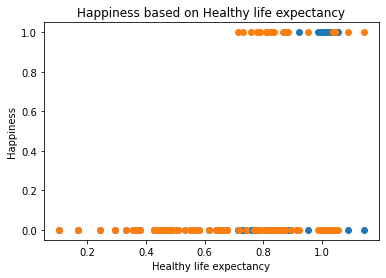

In [15]:
plt.scatter(X_train['Healthy life expectancy'], y_train['Very High'])
plt.title("Happiness based on Healthy life expectancy")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness")

plt.scatter(X_train['Healthy life expectancy'], y_train['High'])
plt.title("Happiness based on Healthy life expectancy")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness")

Text(0, 0.5, 'Happiness')

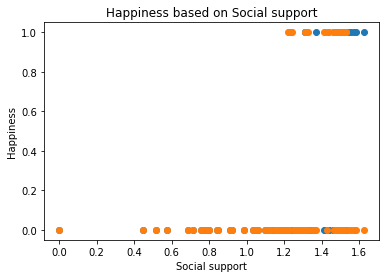

In [16]:
plt.scatter(X_train['Social support'], y_train['Very High'])
plt.title("Happiness based on Social support")
plt.xlabel("Social support")
plt.ylabel("Happiness")

plt.scatter(X_train['Social support'], y_train['High'])
plt.title("Happiness based on Social support")
plt.xlabel("Social support")
plt.ylabel("Happiness")

Text(0, 0.5, 'Happiness')

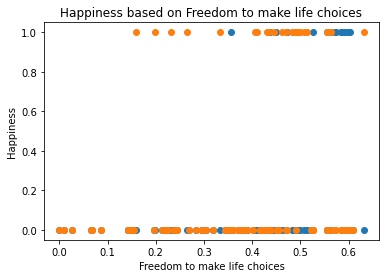

In [17]:
plt.scatter(X_train['Freedom to make life choices'], y_train['Very High'])
plt.title("Happiness based on Freedom to make life choices")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness")

plt.scatter(X_train['Freedom to make life choices'], y_train['High'])
plt.title("Happiness based on Freedom to make life choices")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness")

Looking at the relationships between the predictor variables, according to the graphs below, we can see that:

- Healthy life expectancy and GDP per capita are positively correlated. Relationship is linear.
- Healthy life expectancy and social support are positively correlated. Relationship is linear.
- Although the correlation between healthy life expectancy and freedom to make life choices is small, it exists. The  relationship is not strong and the variance is very high, but the relationship is linear.

Text(0, 0.5, 'GDP per capita')

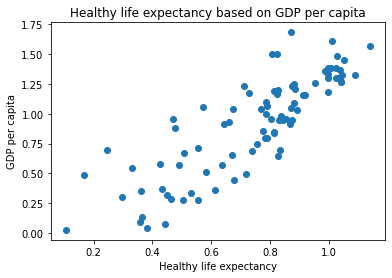

In [18]:
plt.scatter(X_train['Healthy life expectancy'], X_train['GDP per capita'])
plt.title("Healthy life expectancy based on GDP per capita")
plt.xlabel("Healthy life expectancy")
plt.ylabel("GDP per capita")

Text(0, 0.5, 'Social support')

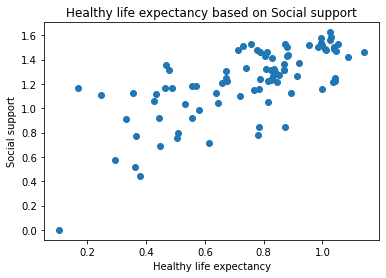

In [19]:
plt.scatter(X_train['Healthy life expectancy'], X_train['Social support'])
plt.title("Healthy life expectancy based on Social support")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Social support")

Text(0, 0.5, 'Social support')

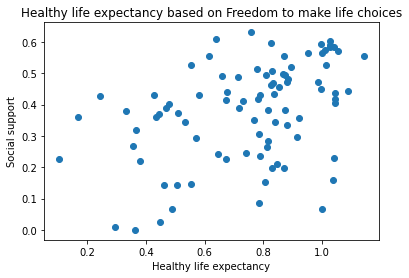

In [20]:
plt.scatter(X_train['Healthy life expectancy'], X_train['Freedom to make life choices'])
plt.title("Healthy life expectancy based on Freedom to make life choices")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Social support")

### Examine Features That Predict Happiness Categories Using a Model That Allows for Automatic Feature Selection

When we look at the feature importances for Random Forest Classifier, we can see that GDP per capita, healthy life expectancy, and social support are all important variables. GDP per capita, in particular, is a powerful predictor of happiness. Region, corruption perceptions, sub-region, and generosity are not strong predictors as they have a small relationship with the target variable.

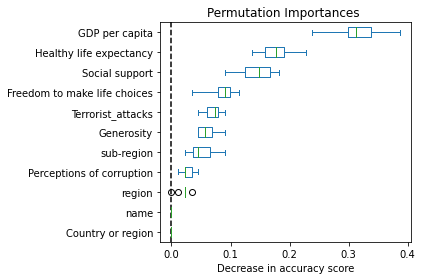

In [21]:
from sklearn.inspection import permutation_importance

rf = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances ")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## Part 3: First Three models Before Speaking With Teammates

### First Model: Random Forest

Random Forest Classifier with n_estimators=250 and max_depth=4

In [22]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=250, max_depth=4, random_state=0)
model1.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model1.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9204545454545454

In [23]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [24]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [25]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [26]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [27]:
#Submit Model 1:

#-- Generate predicted values (Model 1)
prediction_labels = model1.predict(preprocessor(X_test))
# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model1.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): emin
Provide any useful notes about your model (optional): emin

Your model has been submitted as model version 630

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Second Model: GradientBoostingClassifier



GradientBoostingClassifier with n_estimators=45, learning_rate=1.2, and max_depth=1

In [29]:
model2 = GradientBoostingClassifier(n_estimators=45, learning_rate=1.2,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model2.score(preprocessor(X_train), y_train_labels)

0.9772727272727273

In [30]:
# Save sklearn model to local ONNX file

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [31]:
#-- Generate predicted values 
prediction_labels = model2.predict(preprocessor(X_test))

In [32]:
# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): emin
Provide any useful notes about your model (optional): emin

Your model has been submitted as model version 631

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Third Model: Deep Learning (Sequential)

Deep Learning (sequential) with relu activation and hidden layers 64, 32, 16, 16

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

model3 = Sequential()
model3.add(Dense(64, input_dim=feature_count, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(16, activation='relu'))

model3.add(Dense(5, activation='softmax'))

np.random.seed(42)
                                            
# Compile model
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model3.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

Epoch 1/300
4/4 [==============================] - 1s 81ms/step - loss: 1.6374 - accuracy: 0.1970 - val_loss: 1.6261 - val_accuracy: 0.1818
Epoch 2/300
4/4 [==============================] - 0s 13ms/step - loss: 1.6270 - accuracy: 0.2273 - val_loss: 1.6185 - val_accuracy: 0.1818
Epoch 3/300
4/4 [==============================] - 0s 12ms/step - loss: 1.6160 - accuracy: 0.1970 - val_loss: 1.6090 - val_accuracy: 0.2273
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 1.6048 - accuracy: 0.2273 - val_loss: 1.6036 - val_accuracy: 0.1818
Epoch 5/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5948 - accuracy: 0.2576 - val_loss: 1.5961 - val_accuracy: 0.1818
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5840 - accuracy: 0.2727 - val_loss: 1.5898 - val_accuracy: 0.1818
Epoch 7/300
4/4 [==============================] - 0s 13ms/step - loss: 1.5760 - accuracy: 0.3182 - val_loss: 1.5825 - val_accuracy: 0.1818
Epoch 8/300
4/4 [===

In [63]:
# Save keras model to ONNX file 

onnx_model = model_to_onnx(model3, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model3.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [64]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model3.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

3/3 [==============================] - 0s 8ms/step


In [65]:
# Submit keras to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model3.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): emin
Provide any useful notes about your model (optional): emin

Your model has been submitted as model version 658

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Part 4: Last Three models After Speaking With Teammates

We discussed the use of GridSearchCV and evaluated the most effective models for our project. Our team concluded that Gradient Boosting Classifier (GBC), Random Forest (RF), and Deep Learning models were the top performers. Examining the results on the Ai Modelshare model playground leaderboard, it is evident that the Gradient Boosting Classifier (GBC), Random Forest (RF), and Deep Learning models produced superior performance compared to other models, confirming our team's assessment. Random forest and gradient boosting are both extremely powerful tree models that necessitate precise hyperparameter selection, particularly CBC. It stands to reason that they perform well. Deep learning models are also very powerful, and due to signaling, hyperparameter tuning is significantly easier than GBC. I chose RF, GBC, and Deep Learning as my first three test models, and I intend to use them as my main models as well.

### Fourth Model: Random Forest with GridSearchCV

Random Forest Classifier with GridSearchCV, cv = 10
max_depth: 7, n_estimators: 110

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(30, 150, 10),'max_depth':[3, 5, 7, 9, 11, 13]} #np.arange creates sequence of numbers for each k value

model4 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
model4.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(model4.best_score_))
print("best parameters: {}".format(model4.best_params_))

best mean cross-validation score: 0.728
best parameters: {'max_depth': 7, 'n_estimators': 110}


In [42]:
# Save sklearn model to local ONNX file

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model4, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model4.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [45]:
#Submit Model 4: 

#-- Generate predicted values
prediction_labels = model4.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model4.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): emin
Provide any useful notes about your model (optional): emin

Your model has been submitted as model version 645

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Fifth Model: GradientBoostingClassifier with GridSearchCV

GradientBoostingClassifier with GridSearchCV, cv = 10,
learning_rate: 1.1, max_depth: 5, n_estimators: 49

In [47]:
param_grid = {'n_estimators': np.arange(40, 60, 3),'learning_rate': np.arange(0.1, 2, 0.5), 'max_depth': np.arange(1, 10, 2)}

model5 = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:

model5.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"

print("best mean cross-validation score: {:.3f}".format(model5.best_score_))
print("best parameters: {}".format(model5.best_params_))

best mean cross-validation score: 0.661
best parameters: {'learning_rate': 1.1, 'max_depth': 5, 'n_estimators': 49}


In [48]:
# Save sklearn model to local ONNX file

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model5, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model5.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [49]:
#-- Generate predicted values 
prediction_labels = model5.predict(preprocessor(X_test))

In [50]:
# Submit Model 5 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model5.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): emin
Provide any useful notes about your model (optional): emin

Your model has been submitted as model version 652

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Sixth Model: Deep Learning (Sequential) More Complex

Deep Learning (Sequential) with 128, 64, 64, 64, 32, 32, 16

categorical_crossentropy, optimizer = sgd, metrics = accuracy 

 batch_size = 20, epochs = 350, validation_split = 0.25

In [85]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

model6 = Sequential()
model6.add(Dense(128, input_dim=feature_count, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(16, activation='relu'))


model6.add(Dense(5, activation='softmax')) 

np.random.seed(42)
                                           
# Compile model
model6.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model6.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 350, validation_split=0.25)  

Epoch 1/350
4/4 [==============================] - 1s 79ms/step - loss: 1.6226 - accuracy: 0.1212 - val_loss: 1.6259 - val_accuracy: 0.0455
Epoch 2/350
4/4 [==============================] - 0s 13ms/step - loss: 1.6184 - accuracy: 0.1667 - val_loss: 1.6242 - val_accuracy: 0.0455
Epoch 3/350
4/4 [==============================] - 0s 13ms/step - loss: 1.6148 - accuracy: 0.1970 - val_loss: 1.6228 - val_accuracy: 0.1364
Epoch 4/350
4/4 [==============================] - 0s 19ms/step - loss: 1.6123 - accuracy: 0.2424 - val_loss: 1.6216 - val_accuracy: 0.1364
Epoch 5/350
4/4 [==============================] - 0s 13ms/step - loss: 1.6101 - accuracy: 0.2424 - val_loss: 1.6210 - val_accuracy: 0.1364
Epoch 6/350
4/4 [==============================] - 0s 13ms/step - loss: 1.6078 - accuracy: 0.2879 - val_loss: 1.6208 - val_accuracy: 0.1364
Epoch 7/350
4/4 [==============================] - 0s 13ms/step - loss: 1.6060 - accuracy: 0.2879 - val_loss: 1.6204 - val_accuracy: 0.1364
Epoch 8/350
4/4 [===

In [86]:
# Save keras model to ONNX file 

onnx_model = model_to_onnx(model6, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model6.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [87]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=model6.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

3/3 [==============================] - 0s 4ms/step


In [88]:
# Submit keras to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model6.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): emin
Provide any useful notes about your model (optional): min

Your model has been submitted as model version 669

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [90]:
# Check leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)